## Load the dataset

In [1]:
! pip install  transformers torch langchain datasets huggingface_hub

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion", "split")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
ds["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

# Data Preparation and Exploration

In [6]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
# dataset to datafrome

import pandas as pd
df = pd.DataFrame(dataset["train"])
df.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
# dataset label column name add to df

df['label_name'] = df['label'].apply(lambda x: dataset["train"].features["label"].int2str(x))
df.head(5)


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


NameError: name 'label_name' is not defined

In [ ]:
# pi chart for the distribution of label_name

import plotly.express as px
fig = px.pie(df, names='label_name', title='Distribution of Label Names')
fig.show()


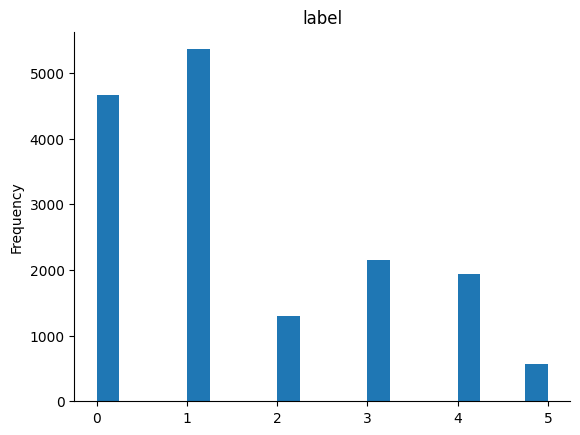

In [ ]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

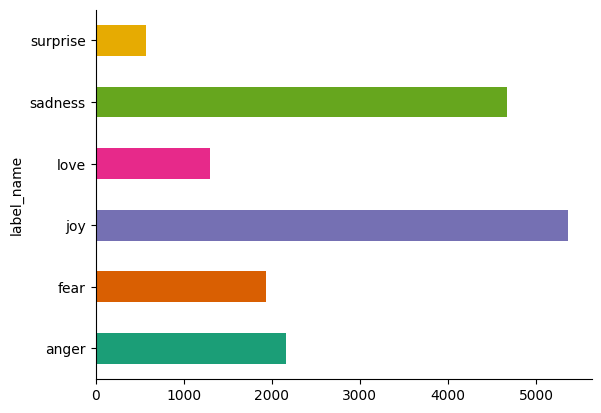

In [ ]:
# @title label_name

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

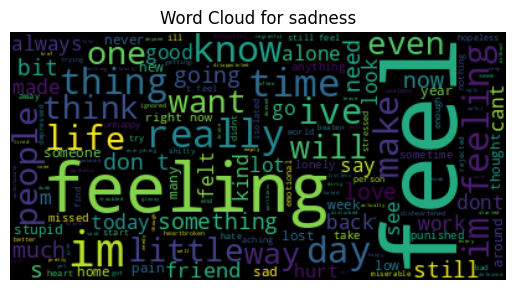

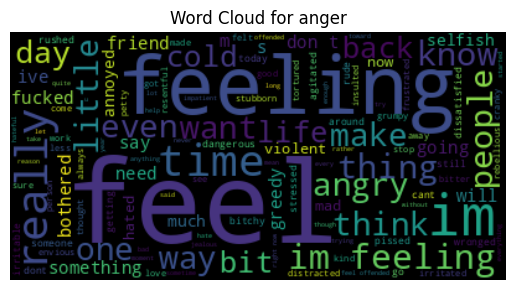

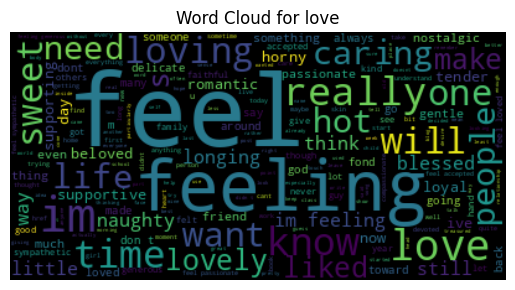

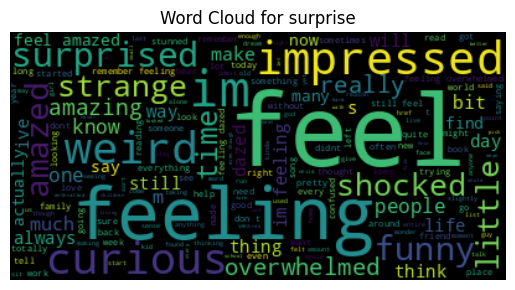

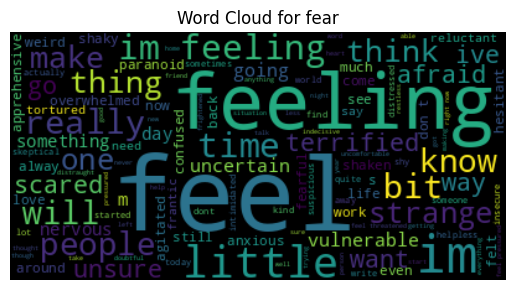

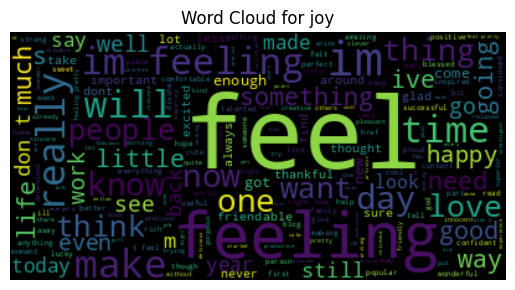

In [ ]:
# @title Word Clouds for Each Label Name

import matplotlib.pyplot as plt
from wordcloud import WordCloud

label_names = df['label_name'].unique()

for label_name in label_names:
    text = ' '.join(df[df['label_name'] == label_name]['text'])
    wordcloud = WordCloud().generate(text)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label_name}')

In [9]:
# View dataset structure
print(dataset)

# Check the first few samples
print(dataset['train'][0])
print(dataset['validation'][0])
print(dataset['test'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'im feeling quite sad and sorry for myself but ill snap out of it soon', 'label': 0}
{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0}


### Data Preprocessing

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [11]:
# Convert DatasetDict to DataFrame
train_df = pd.DataFrame(tokenized_datasets["train"])
validation_df = pd.DataFrame(tokenized_datasets["validation"])
test_df = pd.DataFrame(tokenized_datasets["test"])

# Display the DataFrames
print("Train DataFrame:")
display(train_df.head())

print("\nValidation DataFrame:")
display(validation_df.head())

print("\nTest DataFrame:")
display(test_df.head())


Train DataFrame:


,text,label,input_ids,token_type_ids,attention_mask
0,i didnt feel humiliated,0,"[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i can go from feeling so hopeless to so damned...,0,"[101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,im grabbing a minute to post i feel greedy wrong,3,"[101, 10047, 9775, 1037, 3371, 2000, 2695, 104...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
3,i am ever feeling nostalgic about the fireplac...,2,"[101, 1045, 2572, 2412, 3110, 16839, 9080, 128...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i am feeling grouchy,3,"[101, 1045, 2572, 3110, 24665, 7140, 11714, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."



Validation DataFrame:


,text,label,input_ids,token_type_ids,attention_mask
0,im feeling quite sad and sorry for myself but ...,0,"[101, 10047, 3110, 3243, 6517, 1998, 3374, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,i feel like i am still looking at a blank canv...,0,"[101, 1045, 2514, 2066, 1045, 2572, 2145, 2559...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,i feel like a faithful servant,2,"[101, 1045, 2514, 2066, 1037, 11633, 7947, 102...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,i am just feeling cranky and blue,3,"[101, 1045, 2572, 2074, 3110, 27987, 2100, 199...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
4,i can have for a treat or if i am feeling festive,1,"[101, 1045, 2064, 2031, 2005, 1037, 7438, 2030...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."



Test DataFrame:


,text,label,input_ids,token_type_ids,attention_mask
0,im feeling rather rotten so im not very ambiti...,0,"[101, 10047, 3110, 2738, 11083, 2061, 10047, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
1,im updating my blog because i feel shitty,0,"[101, 10047, 2039, 16616, 2026, 9927, 2138, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
2,i never make her separate from me because i do...,0,"[101, 1045, 2196, 2191, 2014, 3584, 2013, 2033...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,i left with my bouquet of red and yellow tulip...,1,"[101, 1045, 2187, 2007, 2026, 26700, 1997, 241...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i was feeling a little vain when i did this one,0,"[101, 1045, 2001, 3110, 1037, 2210, 15784, 204...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."


## Prepare Data For Training

In [12]:
import torch

tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "label"])
train_dataset = tokenized_datasets["train"]
validation_dataset = tokenized_datasets["validation"]
test_dataset = tokenized_datasets["test"]

small_train_dataset = tokenized_datasets["train"].select(range(10))


In [13]:
train_dataset,test_dataset,validation_dataset,test_dataset

(Dataset({
     features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 16000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 2000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 2000
 }),
 Dataset({
     features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
     num_rows: 2000
 }))

In [14]:
# View dataset structure
print(tokenized_datasets)

# Check the first few samples of the train, validation, and test sets
print(tokenized_datasets['train'][0])
print(tokenized_datasets['validation'][0])
print(tokenized_datasets['test'][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})
{'label': tensor(0), 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,  

# Model Fine-Tuning


In [15]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments


In [ ]:
# Load your pre-trained model, here using BERT as an example
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 6 )

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    weight_decay=0.01,

)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
)

# Fine-tune the model
trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

Avoid training the entire model due to the large number of parameters have several options:

1. Feature Extraction: Use the pre-trained model as a fixed feature extractor.
2. Fine-Tuning Only Certain Layers: Fine-tune only the top layers while keeping the rest frozen.
3. Adapter Layers: Use adapter layers, which add small trainable layers to the pre-trained model.
4. Parameter-Efficient Fine-Tuning Methods: Utilize methods like LoRA (Low-Rank Adaptation) to fine-tune models efficiently.


### Feature Extraction

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

# Load pre-trained model and tokenizer
model = AutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Freeze the model parameters
for param in model.parameters():
    param.requires_grad = False

# Example of extracting features
def extract_features(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Train a classifier on top of extracted features
# This example assumes you have a DataLoader `train_dataloader` that yields (text, label) pairs
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

features = []
labels = []

for text, label in train_dataloader:
    feature = extract_features(text)
    features.append(feature.numpy())
    labels.append(label)

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Train the classifier
classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
classifier.fit(features, labels)



NameError: name 'train_dataloader' is not defined

### Fine-Tuning Only Certain Layers

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)

# Freeze all layers except the classifier
for param in model.bert.parameters():
    param.requires_grad = False

# Fine-tune the top layers
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

### Using Adapter Layers

In [ ]:
from transformers import BertAdapterModel, AdapterConfig

# Load pre-trained model with adapter
model = BertAdapterModel.from_pretrained("bert-base-uncased")

# Add adapter configuration
adapter_config = AdapterConfig.load("pfeiffer")
model.add_adapter("emotion_classification", config=adapter_config)
model.train_adapter("emotion_classification")

# Now only the adapter layers will be trained
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

trainer.train()


ImportError: cannot import name 'BertAdapterModel' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

### Parameter-Efficient Fine-Tuning (e.g., LoRA)

In [17]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 9.0 MB/s eta 0:00:00


In [18]:
from peft import get_peft_model, LoraConfig, TaskType

# Define LoRA configuration
config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
)

# Load pre-trained model and apply LoRA
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)
model = get_peft_model(model, config)

# Fine-tune the model
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

trainer.train()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.927600,0.828948
2,0.697900,0.613219
3,0.623600,0.549484


TrainOutput(global_step=6000, training_loss=0.863164789835612, metrics={'train_runtime': 3534.5302, 'train_samples_per_second': 13.58, 'train_steps_per_second': 1.698, 'total_flos': 1.2673951137792e+16, 'train_loss': 0.863164789835612, 'epoch': 3.0})

In [19]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Save the fine-tuned model
model.save_pretrained("/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora")

# If you also used a tokenizer, save it as well
tokenizer.save_pretrained("/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora")


('/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/tokenizer_config.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/special_tokens_map.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/vocab.txt',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/added_tokens.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/tokenizer.json')

In [26]:
import os

directory = "/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora"
files = os.listdir(directory)
print(files)


['README.md', 'adapter_model.safetensors', 'adapter_config.json', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt', 'tokenizer.json']


In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora"

# Load the model and tokenizer from the base model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Save the model and tokenizer to the specified path
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


('/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/tokenizer_config.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/special_tokens_map.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/vocab.txt',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/added_tokens.json',
 '/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora/tokenizer.json')

In [35]:
from transformers import pipeline

# Define the label mapping
label_mapping = {
    'LABEL_0': 'joy',
    'LABEL_1': 'sadness',
    'LABEL_2': 'anger',
    'LABEL_3': 'fear',
    'LABEL_4': 'love',
    'LABEL_5': 'surprise'
}

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/Langchain Tutorial/emotions_text_classify_huggingface_transformers/fine-tuned-bert-lora"
classifier = pipeline("text-classification", model=model_path, tokenizer=model_path)

# Get user input
user_text = input("Enter text: ")

# Predict emotion
result = classifier(user_text)

# Print the predicted emotion
predicted_label = result[0]['label']
predicted_emotion = label_mapping.get(predicted_label, 'Unknown')
print(f"Predicted Emotion: {predicted_emotion}")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Enter text: what is core concept of love
Predicted Emotion: surprise
